# Probabilistic Perspective


### Machine Learning and Computational Statistics (DSC6135)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from matplotlib.pyplot import cm
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Ridge

In [2]:
#create training and tests inputs
def generate_data(number_of_train=20, number_of_test=100):
    x_train = np.linspace(-5, 5, number_of_train)
    x_test = np.linspace(-5, 5, number_of_test)
    #define a function relating input to output
    f = lambda x: 0.01 * x**3  
    #generate noisy training labels
    y_train = f(x_train) + np.random.normal(0, 0.25, number_of_train)
    y_test = f(x_test) + np.random.normal(0, 0.25, number_of_test)
    return x_train, x_test, y_train, y_test

# Probabilistic Model of Regression

### Exercise: Probabilistic Model of Linear Regression
As explained in class, we can view the label $y$ as the noisy observation of a function $f(x)$. That is,
$$
y = f(x) + \epsilon,\; \epsilon \sim \mathcal{N}(0, \sigma^2)
$$

where $\epsilon$ represents the output noise and is a normally distributed random variable. We claimed that $y$ is then a random variable distributed as $y\sim \mathcal{N}(f(x), \sigma^2)$.

In this exercise, fix $x=2$, let $f(x) = x + 2$ and $\epsilon \sim \mathcal{N}(0, 1)$. Sample $N$ number of $\epsilon$'s and show that $y$ is a normally distributed random variable by plotting values of $y$ in a histogram. What is the mean and variance of the random variable $y$?

In [3]:
###
# FILL THIS IN
# Sample the noise and visualize the variation of the prediction caused by the variation of the noise
# Hint: plot a histogram of the y's
###

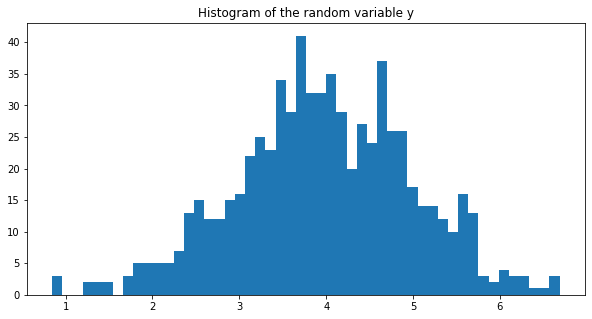

In [4]:
### SOLUTION
N = 700
x = 2
epsilons = np.random.normal(0, 1, N)
y = x + 2 + epsilons

fig, ax = plt.subplots(1, 1, figsize=(10, 5))
ax.hist(y, bins=50)
ax.set_title('Histogram of the random variable y')
plt.show()

### Exercise: Interpreting the likelihood function

Say we're considering two linear models for the dataset $\{(1, 2), (2, 3)\}$ with iid noise $\epsilon_n \sim \mathcal{N}(0, 1)$.

1. Model 1: $y = x + 2$
2. Model 2: $y = -2x + 2$

Which model, assuming one is correct, is more appropriate for the data?

In [5]:
from scipy.stats import norm
#data
x_train = np.array([1, 2])
y_train = np.array([2, 3])

#likelihood functions
lkhd = lambda m, b: norm(m * x_train[0] + b, 1).pdf(y_train[0]) * norm(m * x_train[1] + b, 1).pdf(y_train[1])
print('likelihood of data under model 1:', np.round(lkhd(1, 2), 7))
print('likelihood of data under model 2:', np.round(lkhd(-2, 2), 7))

likelihood of data under model 1: 0.0585498
likelihood of data under model 2: 1e-07


# Bayesian Model of Regression

In [6]:
#number of training inputs
number_of_train_points = 50
#number of testing inputs
number_of_test_points = 100
#function generating our data
f = lambda x: 0.01 * x**3
#make test input that is evenly spaced over [-5, 5]
x_test = np.linspace(-5, 5, number_of_test_points)
#sample training input
x_train = np.random.uniform(-5, 5, number_of_train_points)
#compute noisy label
y_train = f(x_train) + np.random.normal(0, 0.5, number_of_train_points)

In [7]:
# generate some data
x_train, x_test, y_train, y_test = generate_data()

#instantiate a polynomial feature model for a degree 20 polynomial
polynomial_features = PolynomialFeatures(20)
#tranform training inputs into polynomial features
poly_x_train = polynomial_features.fit_transform(x_train.reshape((-1, 1)))
#tranform testing inputs into polynomial features
poly_x_test = polynomial_features.transform(x_test.reshape((-1, 1)))
    
#dimension of the weight vector is the number of polynomial features plus the bias
number_of_weights = 20 + 1

#defining a normal prior on weights
sigma = 10.
prior_mean = np.zeros(number_of_weights)
prior_variance = sigma * np.eye(number_of_weights)

#the posterior over weights is a normal distribution
#posterior variance
posterior_variance = np.linalg.inv(1. / sigma * np.eye(number_of_weights) + poly_x_train.T.dot(poly_x_train)) 
#posterior mean
posterior_mean = posterior_variance.dot(poly_x_train.T.dot(y_train.reshape((-1, 1))) * 1. / sigma)

### Exercise: Visualizing the posterior

What is the point of computing the posterior distribution $p(w| x, y)$ over weights rather than a point estimate of the 'best weight vector' for the data?

Since we have a distribution for $w$, we can sample some weight vectors, **each sampled weight vector represents a different model** for the data. In the following, visualize the functions from the posterior distribution.

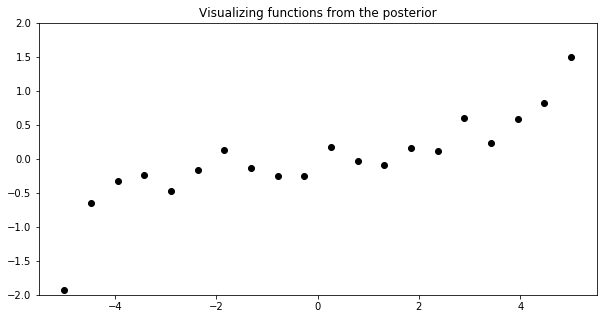

In [8]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
#plot the training data
ax.scatter(x_train, y_train, color='black')
#number of samples from the posterior
number_of_samples = 100

###
# FILL THIS IN
# sample 100 w's from the posterior, visualize each w as a function over the test inputs
###

ax.set_title('Visualizing functions from the posterior')
ax.set_ylim([-2, 2])
plt.show()

/opt/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: RuntimeWarning: covariance is not positive-semidefinite.
  # Remove the CWD from sys.path while we load stuff.


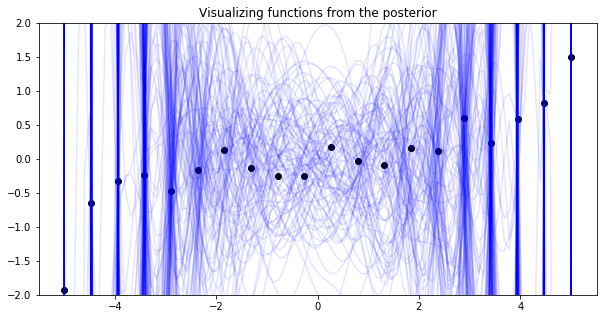

In [9]:
### SOLUTION
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
#plot the training data
ax.scatter(x_train, y_train, color='black')
#number of samples from the posterior
number_of_samples = 100

for i in range(number_of_samples):
    #sample a set of parameters from the posterior
    w = np.random.multivariate_normal(posterior_mean.flatten(), posterior_variance, 1)
    #predict using this sampled parameter
    y_pred = w.dot(poly_x_test.T)
    #plot the function represented by this sampled parameter
    ax.plot(x_test, y_pred.flatten(), color='blue', alpha=0.1)

ax.set_title('Visualizing functions from the posterior')
ax.set_ylim([-2, 2])
plt.show()

What do you notice about the numerical issues involving computing the posterior variance analytically? What can we do to address these issues?

Change the prior for $w$ (vary the value for `sigma`), how does your choice of prior affect the posterior over $w$? Can you explain this effect?

Change the number of training data that you sample, how does the number of training data points affect the posterior over $w$? Can you explain this effect?


### Exercise: Visualize the Posterior Predictive
For each test input $x$, each $w$ sampled from the posterior will make a different prediction of the output $y$, thus, the posterior distribution of $w$ induces a distribution over predictions for test input $x$, this is the posterior predictive $p(y|x)$.

In the following, use samples from the posterior over $w$ to generate the posterior predictive distribution for a given input (say $x=2.5$). Visualize the posterior predictive distribution.

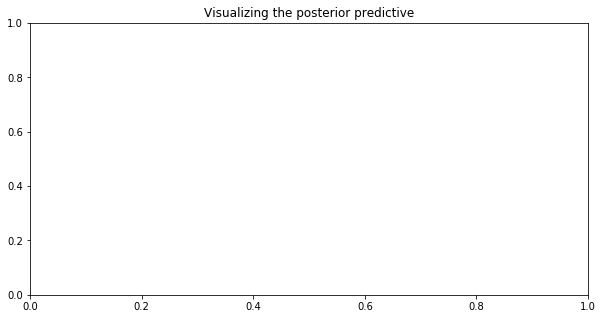

In [10]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
#number of samples from the posterior
number_of_samples = 500
#our test input
x_test = np.array([2.5])
#our test input transformed into polynomial features
poly_x_test = polynomial_features.fit_transform(x_test.reshape((-1, 1)))

###
# FILL THIS IN
# sample 500 w's from the posterior, use them to simulate the posterior predictive p(y|x) for x=2.5
# visualize the posterior predictive as a histogram
###

ax.set_title('Visualizing the posterior predictive')
plt.show()

/opt/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:13: RuntimeWarning: covariance is not positive-semidefinite.
  del sys.path[0]


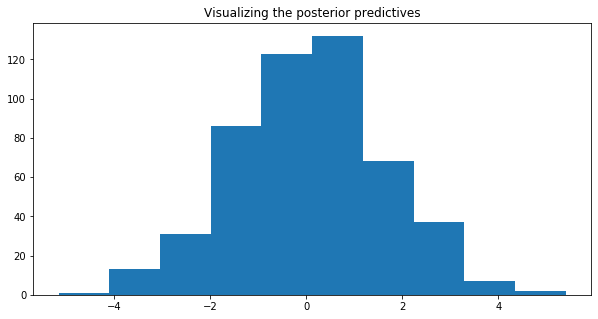

In [11]:
### SOLUTION
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
#number of samples from the posterior predictive
number_of_samples = 500
#our test point
x_test = np.array([2.5])
#tranform our test point into polynomial features
poly_x_test = polynomial_features.fit_transform(x_test.reshape((-1, 1)))
y_pred = []

for i in range(number_of_samples):
    #sample a parameter from the posterior
    w = np.random.multivariate_normal(posterior_mean.flatten(), posterior_variance, 1)
    #make a prediction on the test point using the sampled parameter
    y_pred.append(w.dot(poly_x_test[0].T))
#plot a histogram of the predicted values
ax.hist(np.array(y_pred), bins=10)

ax.set_title('Visualizing the posterior predictives')
plt.show()

Based on the posterior predictive distribution, what can you say about the predicted label for the input?

Can you list the pros and cons of computing point estimates for the model parameters and computing posterior distributions over parameters?